
sdi2000209 - Φωτόπουλος Σπυρίδων

sdi2000097 - Κουκουβέ Ζωή

In [ ]:
# Linking google drive to load/save results?
save_path = '/content/gdrive/'
from google.colab import drive
drive.mount(save_path, force_remount=True)
save_path += 'MyDrive/TEDE/'

Mounted at /content/gdrive/


# **Ερώτημα 1**

Σημείωση: Στο DataFrame θα κρατάμε κάθε φορά μόνο τις χρήσιμες στήλες που θα χρησιμοποιηθούν αργότερα, λόγω του μεγάλου όγκου των δεδομένων και θα αφαιρούμε όσες γραμμές, λόγω σφάλματος στα αρχικά δεδομένα, αποκτήσουν την τιμή NaN.

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import io

# Load data
data = pd.read_csv(save_path+'books_1.Best_Books_Ever.csv')

# Keep only useful columns
df = data[['bookId','ratingsByStars','publishDate','genres','rating','pages','title','author','language','description','coverImg']].copy()

# Print datatypes and a sample
print(df.dtypes)
df.head(5)

bookId             object
ratingsByStars     object
publishDate        object
genres             object
rating            float64
pages              object
title              object
author             object
language           object
description        object
coverImg           object
dtype: object


bookId  \
0                     2767052-the-hunger-games   
1  2.Harry_Potter_and_the_Order_of_the_Phoenix   
2                   2657.To_Kill_a_Mockingbird   
3                     1885.Pride_and_Prejudice   
4                               41865.Twilight   

                                      ratingsByStars publishDate  \
0  ['3444695', '1921313', '745221', '171994', '93...    09/14/08   
1  ['1593642', '637516', '222366', '39573', '14526']    09/28/04   
2  ['2363896', '1333153', '573280', '149952', '80...    05/23/06   
3  ['1617567', '816659', '373311', '113934', '767...    10/10/00   
4  ['1751460', '1113682', '1008686', '542017', '5...    09/06/06   

                                              genres  rating pages  \
0  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...    4.33   374   
1  ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...    4.50   870   
2  ['Classics', 'Fiction', 'Historical Fiction', ...    4.28   324   
3  ['Classics', 'Fiction', 'Romance', 'Historical...    4.26   279   
4  ['Young Adult', 'Fantasy', 'Romance', 'Vampire...    3.60   501   

                                       title  \
0                           The Hunger Games   
1  Harry Potter and the Order of the Phoenix   
2                      To Kill a Mockingbird   
3                        Pride and Prejudice   
4                                   Twilight   

                                      author language  \
0                            Suzanne Collins  English   
1  J.K. Rowling, Mary GrandPré (Illustrator)  English   
2                                 Harper Lee  English   
3  Jane Austen, Anna Quindlen (Introduction)  English   
4                            Stephenie Meyer  English   

                                         description  \
0  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...   
1  There is a door at the end of a silent corrido...   
2  The unforgettable novel of a childhood in a sl...   
3  Alternate cover edition of ISBN 9780679783268S...   
4  About three things I was absolutely positive.\...   

                                            coverImg  
0  https://i.gr-assets.com/images/S/compressed.ph...  
1  https://i.gr-assets.com/images/S/compressed.ph...  
2  https://i.gr-assets.com/images/S/compressed.ph...  
3  https://i.gr-assets.com/images/S/compressed.ph...  
4  https://i.gr-assets.com/images/S/compressed.ph...

In [ ]:
# Let's remove rows with 'Nan'
df.dropna(inplace=True)
df.head(5)

bookId  \
0                     2767052-the-hunger-games   
1  2.Harry_Potter_and_the_Order_of_the_Phoenix   
2                   2657.To_Kill_a_Mockingbird   
3                     1885.Pride_and_Prejudice   
4                               41865.Twilight   

                                      ratingsByStars publishDate  \
0  ['3444695', '1921313', '745221', '171994', '93...    09/14/08   
1  ['1593642', '637516', '222366', '39573', '14526']    09/28/04   
2  ['2363896', '1333153', '573280', '149952', '80...    05/23/06   
3  ['1617567', '816659', '373311', '113934', '767...    10/10/00   
4  ['1751460', '1113682', '1008686', '542017', '5...    09/06/06   

                                              genres  rating pages  \
0  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...    4.33   374   
1  ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...    4.50   870   
2  ['Classics', 'Fiction', 'Historical Fiction', ...    4.28   324   
3  ['Classics', 'Fiction', 'Romance', 'Historical...    4.26   279   
4  ['Young Adult', 'Fantasy', 'Romance', 'Vampire...    3.60   501   

                                       title  \
0                           The Hunger Games   
1  Harry Potter and the Order of the Phoenix   
2                      To Kill a Mockingbird   
3                        Pride and Prejudice   
4                                   Twilight   

                                      author language  \
0                            Suzanne Collins  English   
1  J.K. Rowling, Mary GrandPré (Illustrator)  English   
2                                 Harper Lee  English   
3  Jane Austen, Anna Quindlen (Introduction)  English   
4                            Stephenie Meyer  English   

                                         description  \
0  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...   
1  There is a door at the end of a silent corrido...   
2  The unforgettable novel of a childhood in a sl...   
3  Alternate cover edition of ISBN 9780679783268S...   
4  About three things I was absolutely positive.\...   

                                            coverImg  
0  https://i.gr-assets.com/images/S/compressed.ph...  
1  https://i.gr-assets.com/images/S/compressed.ph...  
2  https://i.gr-assets.com/images/S/compressed.ph...  
3  https://i.gr-assets.com/images/S/compressed.ph...  
4  https://i.gr-assets.com/images/S/compressed.ph...

In [ ]:
# Split 'ratingsByStars' to 5 columns
df = df[df["ratingsByStars"].str.contains("\[\]") == False].copy() # remove empty strings
df[['ratingStar5', 'ratingStar4', 'ratingStar3', 'ratingStar2', 'ratingStar1']] = df['ratingsByStars'].str.replace("\[\'",'').str.replace("\'\]",'').str.split("', '", expand = True).apply(pd.to_numeric)
df.drop('ratingsByStars', axis=1, inplace=True)

<ipython-input-4-e7ff801fc3a9>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[['ratingStar5', 'ratingStar4', 'ratingStar3', 'ratingStar2', 'ratingStar1']] = df['ratingsByStars'].str.replace("\[\'",'').str.replace("\'\]",'').str.split("', '", expand = True).apply(pd.to_numeric)


In [ ]:
# Greate genreSingle column
df = df[df["genres"].str.contains("\[\]") == False].copy() # remove empty strings
df['genreSingle'] = df['genres'].str.replace("\[\'",'').str.replace("\'\]",'').str.split("', '", expand = True)[0]
df.drop('genres', axis=1, inplace=True)

<ipython-input-5-10248fca3af0>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['genreSingle'] = df['genres'].str.replace("\[\'",'').str.replace("\'\]",'').str.split("', '", expand = True)[0]


In [ ]:
# Convert 'publishDate' column to datetime
df['publishDate'] = pd.to_datetime(df['publishDate'], infer_datetime_format=True, errors='coerce')
df.dropna(inplace=True) # remove invalid dates

# Extract year from 'publishDate' column
df['publishYear'] = df['publishDate'].dt.year.astype(int)
df.drop('publishDate', axis=1, inplace=True)

# Fix misidentified years (ex. '72 should be 1972 and not 2072)
df.loc[df.publishYear > 2023, 'publishYear'] -= 100

# **Ερώτημα 2**

1. Κατασκευάστε το ιστόγραμμα των ratings στο σύνολο δεδομένων (χρησιμοποιήστε την στήλη rating)


<Axes: title={'center': 'rating'}, ylabel='Frequency'>

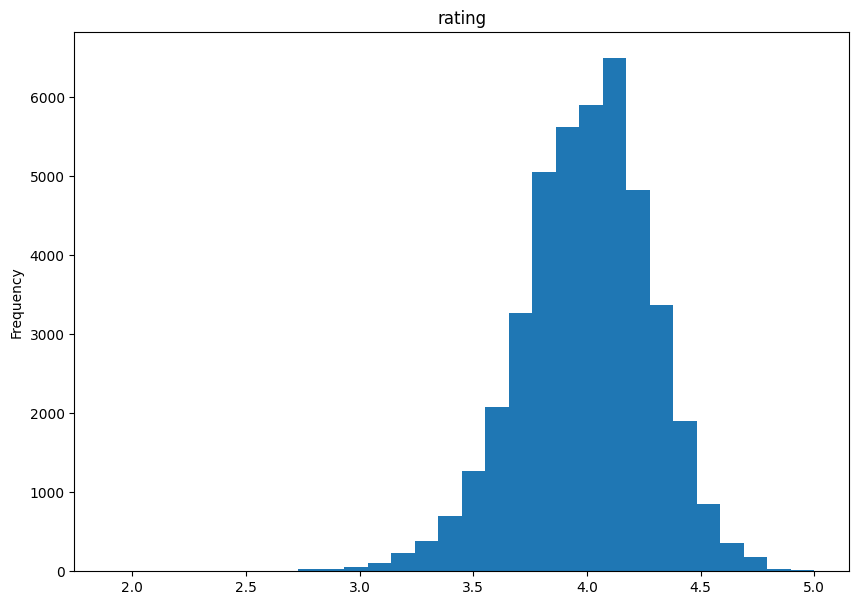

In [ ]:
# plot layout/settings
fig, axes = plt.subplots()
fig.set_size_inches(10,7)

# plot data
column = "rating"
df[column].plot.hist(bins=30, title=column)

2. Ποιά είναι τα 10 βιβλία με τις περισσότερες σελίδες

In [ ]:
# Convert pages to int
df['pages'] = pd.to_numeric(df['pages'], errors="coerce")
df.dropna(inplace=True)
df['pages'] = df['pages'].astype(pd.Int64Dtype())
top_10_pages = df.nlargest(10, 'pages').reset_index()
top_10_pages.index += 1
top_10_pages[['title', 'pages']]

title  pages
1                           The Story of Civilization  14777
2                          The Complete Wheel of Time  11095
3             The Complete Malazan Book of the Fallen   8258
4                                           Animorphs   8245
5                                           Homestuck   8124
6                                                Worm   6680
7      The Complete Aubrey/Maturin Novels (5 Volumes)   6576
8                                    البداية والنهاية   6088
9                              A Song of Ice and Fire   5216
10  One Piece Box Set 3: Thriller Bark to New Worl...   5056

3. Ποιά είναι τα 10 βιβλία με τα περισσότερα 5-αστέρια (χρησιμοποιήστε μόνο τα βιβλία που έχουν λάβει πάνω από 10.000 5-star ratings από τη στήλη ratingStar5) .

In [ ]:
top_10_ratings = df[df['ratingStar5'] > 10000]
top_10_ratings = top_10_ratings.nlargest(10, 'ratingStar5').reset_index()
top_10_ratings.index += 1
top_10_ratings[['title', 'ratingStar5']]

title  ratingStar5
1      Harry Potter and the Sorcerer's Stone      4578137
2                           The Hunger Games      3444695
3                      To Kill a Mockingbird      2363896
4       Harry Potter and the Deathly Hallows      2038930
5   Harry Potter and the Prisoner of Azkaban      1892635
6                     The Fault in Our Stars      1784471
7                                   Twilight      1751460
8        Harry Potter and the Goblet of Fire      1729403
9     Harry Potter and the Half-Blood Prince      1646703
10                       Pride and Prejudice      1617567

5. Ποιοι είναι οι 10 συγγραφεις με τα περισσότερα βιβλία

In [ ]:
# Count the number of unique books per 'author'
top_10_counts = df[['author', 'bookId']].groupby(['author']).count().rename(columns={"bookId" : "bookCount"})

# Retrieve the top 2 values
top_10_counts = top_10_counts.nlargest(10, 'bookCount').reset_index()
top_10_counts.index += 1
top_10_counts

author  bookCount
1      Nora Roberts (Goodreads Author)         80
2                      Agatha Christie         69
3      Stephen King (Goodreads Author)         63
4     Bella Forrest (Goodreads Author)         48
5                          Erin Hunter         48
6   Karen Kingsbury (Goodreads Author)         48
7         Meg Cabot (Goodreads Author)         48
8                      Terry Pratchett         48
9                        Bonnie Bryant         42
10                     Mercedes Lackey         42

13. Πόσα βιβλία εκδίδονται ανά έτος;

In [ ]:
# Count the number of unique books per 'publishYear'
books_per_year = df[['bookId', 'publishYear']].groupby(['publishYear']).count().rename(columns={"bookId" : "bookCount"})
books_per_year

bookCount
publishYear           
1884                 1
1887                 1
1888                 1
1896                 1
1900                 2
...                ...
2016              1181
2017               921
2018               634
2019               501
2020               223

[103 rows x 1 columns]

<Axes: title={'center': 'publishYear'}, ylabel='Frequency'>

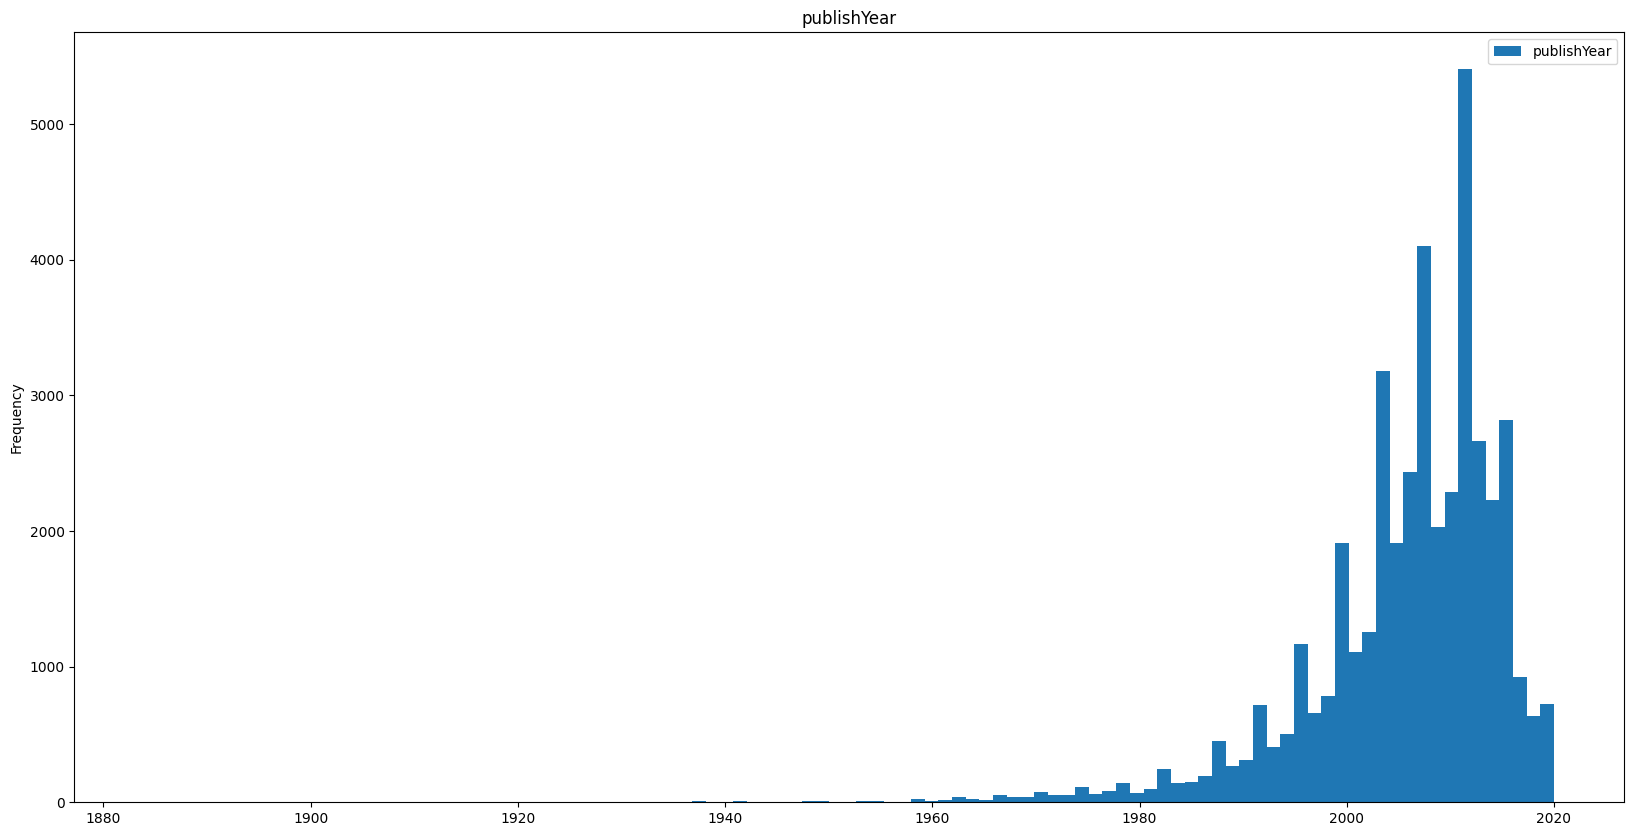

In [ ]:
# Display a histogram of the data
column = "publishYear"
df[['bookId', 'publishYear']].plot.hist(bins=len(books_per_year), title=column, figsize=(20,10))

# **Ερώτημα 3**

Στο πρώτο τμήμα αυτού του ερωτήματος θα "καθαρίσουμε" το description έτσι ώστε να αφαιρέσουμε χαρακτήρες που θα δημιουργήσουν δυσκολίες στη συνέχεια όπως non-ascii characters, σημεία στίξης κλπ.

In [ ]:
mul re
import spacy
from gensim.parsing.preprocessing import remove_stopwords

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner']) # using nlp to lematize each word

# Text cleaning
def clean_text(text):
  # remove non-ascii chars
  text = text.encode('utf-8')
  text = text.decode('ascii', 'replace')
  common = re.compile("[\'\"\!\@\#\$\%\^\&\*\(\)\;\:\,\.\/\?\\\|\`\-]")
  text = common.sub(repl=' ', string=text)
  text = ' '.join([word for word in text.split() if '\uFFFD' not in word])

  text = re.sub(r'\w*\d+\w*', ' ', text)              # remove words containing numbers
  text = re.sub(r'[^A-Za-z\s]+', ' ', text)           # remove numbers and special chars
  text = re.sub(r'[A-Z].*?\s', ' ', text)             # remove names

  sentence = nlp(text)
  text = ' '.join([word.lemma_.lower().strip() for word in sentence if len(word) >= 3]) # lemmatizing  and removing small words
  text = remove_stopwords(text)

  return text

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Get descriptions and text preprocessing
desc_df = df[df['language'] == 'English'].head(5000)  # Keep only a selection of books and only English Text
desc_df.reset_index(inplace=True)
descriptions = desc_df['description']

descriptions = descriptions.apply(clean_text)

Τόσο για unigrams όσο και για bigrams θα υπολογίσουμε τα tfidf scores και, με βάση αυτά, το similarity των βιβλίων μεταξύ τους.

In [ ]:
# UNIGRAMS

# Initialize tk-idf vectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', ngram_range=(1,1))
tfidf_vectors=tfidf_vectorizer.fit_transform(descriptions)

# Create DataFrame for tf-idf scores
tfidf = pd.DataFrame(tfidf_vectors[0].T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["tfidf"])
tfidf = tfidf.sort_values(by=["tfidf"],ascending=False)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity matrix
similarity_unigrams = cosine_similarity(tfidf_vectors, tfidf_vectors)

# Find indices of the 100 most similar items
similar_indices = similarity_unigrams.argsort()[:, ::-1][:, 1:101]

# Retrieve the most similar items
similar_books_unigrams = {}
for i in range(len(desc_df)):
  book_id = desc_df.iloc[i]['bookId']
  similar_book_ids = desc_df.iloc[similar_indices[i]]['bookId'].to_list()
  similar_books_unigrams[book_id] = similar_book_ids

In [ ]:
# BIGRAMS

# Initialize tk-idf vectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', ngram_range=(2,2))
tfidf_vectors=tfidf_vectorizer.fit_transform(descriptions)

# Create DataFrame for tf-idf scores
tfidf = pd.DataFrame(tfidf_vectors[0].T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["tfidf"])
tfidf = tfidf.sort_values(by=["tfidf"],ascending=False)

In [ ]:
# Calculate cosine similarity matrix
similarity_bigrams = cosine_similarity(tfidf_vectors, tfidf_vectors)

# Find indices of the 100 most similar items
similar_indices = similarity_bigrams.argsort()[:, ::-1][:, 1:101]

# Retrieve the most similar items
similar_books_bigrams = {}
for i in range(len(desc_df)):
  book_id = desc_df.iloc[i]['bookId']
  similar_book_ids = desc_df.iloc[similar_indices[i]]['bookId'].to_list()
  similar_books_bigrams[book_id] = similar_book_ids

Ακολουθεί η συνάρτηση recommendation η οποία δέχεται bookId και το επιθυμητό πλήθος παρόμοιων βιβλίων που ζητούνται και επιστρέφει τις προτάσεις. Υπάρχουν 2 εκδόσεις της συνάρτησης, για unigrams και για bigrams.

In [ ]:
def recommend_unigrams(item_id, num = 10):
  book_ind = desc_df[desc_df['bookId'] == item_id].index
  print("Recommending ", num, " books similar to: ", desc_df.iloc[book_ind]['title'][0], "\n---------------------------------------------------------")
  similar = similar_books_unigrams[item_id][0:num]
  for rec_book_id in similar:
    rec_book_ind = desc_df[desc_df['bookId'] == rec_book_id].index
    rec_book = desc_df.iloc[rec_book_ind]
    print("Recommended: ", rec_book['title'].values[0])
    print("Description: ", rec_book['description'].values[0])
    print("score: ", similarity_unigrams[rec_book_ind, book_ind], '\n')


Ακολουθούν παραδείγματα εκτέλεσης

In [ ]:
recommend_unigrams('2767052-the-hunger-games', 5)

Recommending  5  books similar to:  The Hunger Games 
---------------------------------------------------------
Recommended:  SAMPLER ONLY: Catching Fire (The Hunger Games, #2)
Description:  Against all odds, Katniss Everdeen has won the annual Hunger Games with fellow district tribute Peeta Mellark. But it was a victory won by defiance of the Capitol and their harsh rules. The Capitol is angry. The Capitol wants revenge. Suzanne Collins continues the amazing story of Katniss Everdeen in Catching Fire, the second novel of the phenomenal Hunger Games trilogy. Read Chapters one and two to find out what happens next.
score:  [0.24718455] 

Recommended:  Legend
Description:  What was once the western United States is now home to the Republic, a nation perpetually at war with its neighbors. Born into an elite family in one of the Republic's wealthiest districts, fifteen-year-old June is a prodigy being groomed for success in the Republic's highest military circles. Born into the slums, fift

In [ ]:
def recommend_bigrams(item_id, num = 10):
  book_ind = desc_df[desc_df['bookId'] == item_id].index
  print("Recommending ", num, " books similar to: ", desc_df.iloc[book_ind]['title'][0], "\n---------------------------------------------------------")
  similar = similar_books_bigrams[item_id][0:num]
  for rec_book_id in similar:
    rec_book_ind = desc_df[desc_df['bookId'] == rec_book_id].index
    rec_book = desc_df.iloc[rec_book_ind]
    print("Recommended: ", rec_book['title'].values[0])
    print("Description: ", rec_book['description'].values[0])
    print("score: ", similarity_bigrams[rec_book_ind, book_ind], '\n')

In [ ]:
recommend_bigrams('2767052-the-hunger-games', 5)

Recommending  5  books similar to:  The Hunger Games 
---------------------------------------------------------
Recommended:  Saving Francesca
Description:  MOST OF MY friends now go to Pius Senior College, but my mother wouldn't allow it because she says the girls there leave with limited options and she didn't bring me up to have limitations placed upon me. If you know my mother, you'll sense there's an irony there, based on the fact that she is the Queen of the Limitation Placers in my life.Francesca battles her mother, Mia, constantly over what's best for her. All Francesca wants is her old friends and her old school, but instead Mia sends her to St. Sebastian's, an all-boys' school that has just opened its doors to girls. Now Francesca's surrounded by hundreds of boys, with only a few other girls for company. All of them weirdos or worse.Then one day, Mia is too depressed to get out of bed. One day turns into months, and as her family begins to fall apart, Francesca realises that 

# **Ερώτημα 4**

Σε αυτό το ερώτημα επιχειρούμε να εκπαιδεύσουμε το μοντέλο word2vec. Λόγω περιορισμένων πόρων και χρόνου για το training, ενώ φαίνονται η διαδικασία και μερικά βήματα training, στα evaluations με τους classifiers επιλέξαμε να χρησιμοποιήσουμε ένα pretrained model. (Αντιπροσοπεύει καλύτερα τις διαφορές των classifiers)

Στην αρχή καθαρίζουμε και προετοιμάζουμε τα δεδομένα

In [ ]:
# Select the 10 most frequent genres
top_10_genres = df['genreSingle'].value_counts().head(10).index.tolist()

# Filter the DataFrame to keep only the books with these 10 genres
genre_df = df[df['language'] == 'English'][['bookId', 'description', 'genreSingle']]
genre_df = genre_df[genre_df['genreSingle'].isin(top_10_genres)]
genre_df.reset_index(inplace=True)

# Clean descriptions
descriptions = genre_df['description'].apply(clean_text)

# Preparing data
from sklearn import preprocessing
descriptions_list = [desc.split() for desc in descriptions]
genres_vec = preprocessing.LabelEncoder().fit_transform(genre_df['genreSingle']).tolist() # Transforming strings to vector representation

Χωρίζουμε τα δεδομένα σε 2 σύνολα: train & test. Αν έχει ήδη γίνει split νωρίτερα, μπορεί να φορτώσει τα δεδομένα από τα αποθηκευμένα αρχεία.

In [ ]:
import os.path
import pickle
from sklearn.model_selection import train_test_split
import multiprocessing

# Split data into 2 sets
if os.path.isfile(save_path+'data_train.pkl') and os.path.isfile(save_path+'data_test.pkl'):  # if files exist, just load from them
  file = open(save_path+'data_train.pkl', 'rb')
  desc_train_x = pickle.load(file)
  desc_train_y = pickle.load(file)
  file.close()
  file = open(save_path+'data_test.pkl', 'rb')
  desc_test_x = pickle.load(file)
  desc_test_y = pickle.load(file)
  file.close()
  print('Data loaded from file')
else:
  desc_train_x, desc_test_x, desc_train_y, desc_test_y = train_test_split(descriptions_list, genres_vec, train_size=0.8, shuffle=True, stratify=genre_df['genreSingle'].values)
  file = open(save_path+'data_train.pkl', 'wb')
  pickle.dump(desc_train_x, file)
  pickle.dump(desc_train_y, file)
  file.close()
  file = open(save_path+'data_test.pkl', 'wb')
  pickle.dump(desc_test_x, file)
  pickle.dump(desc_test_y, file)
  file.close()
  print('Data generated and saved to file')

Data loaded from file


In [ ]:
def calc_embeddings(dict, features, data):
  emb = []
  for description in data:
    vectors = [dict[word] for word in description if word in dict]
    if vectors:
        avg_vector = sum(vectors) / len(vectors)
    else:
        avg_vector = [0] * features  # Use zero vectors for words not in vocabulary
    emb.append(avg_vector)
  return emb

## Word2Vec

Στο επόμενο βήμα γίνεται train το μοντέλο word2vec. Αν έχει ήδη γίνει trained νωρίτερα, μπορεί να φορτώσει τα δεδομένα του μοντέλου από το αποθηκευμένο αρχείο. Για το training θα υλοποιήσουμε ένα iterative approach, όπου θα ελέγχουμε το μοντέλο σε κάθε epoch ώστε να παρακολουθούμε την πρόοδο και να αποφύγουμε overfitting. Στο τέλος επιλέγεται αυτόματα το βέλτιστο μοντέλο.

In [ ]:
# This function is used to iteratively evaluate model's performance during training
def evaluate_model(model, description_vectors_train, description_vectors_test):
  from sklearn.metrics import accuracy_score
  from sklearn.model_selection import cross_validate
  from sklearn.ensemble import RandomForestClassifier

  def get_mean_scores(model, X, Y, scoring = 'accuracy', cv = 5) :
    score = cross_validate(model, X, Y, scoring = scoring, cv = cv)
    return {keys : np.mean(vals) for keys, vals in score.items()}

  #### Random Forests
  # Create fit instance of classifier
  forest = RandomForestClassifier(max_depth=20)
  forest.fit(description_vectors_train, desc_train_y);

  # Predict and show results
  score = get_mean_scores(forest, description_vectors_train, desc_train_y, cv = 2)['test_score']

  return score

In [ ]:
# Helper function used as callback after each training epoch
def iterative_training(model, epoch):
  # save model to file for future use
  file = open(save_path+'w2v_model' + str(epoch) + '.pkl', 'wb')
  pickle.dump(model, file)
  file.close()
  print('Model', epoch, 'saved to file')

  # evaluate performance
  print('Evaluating performance')
  description_vectors_train = calc_embeddings(model.wv, features, desc_train_x)
  description_vectors_test = calc_embeddings(model.wv, features, desc_test_x)
  scores = evaluate_model(model, description_vectors_train, description_vectors_test)
  print("-- Model", epoch, "accuracy: ", scores,"\n")

  return scores

In [ ]:
from gensim.models.callbacks import CallbackAny2Vec
class EpochSaver(CallbackAny2Vec):
    # Callback to save model after each epoch
    def __init__(self, model_scores):
      self.epoch = 0
      self.model_scores = model_scores

    def on_epoch_end(self, model):
      score = iterative_training(model, self.epoch)
      model_scores.append(score)
      self.epoch += 1

In [ ]:
from gensim.models import Word2Vec
from shutil import copyfile

# Setup logging
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# Split the descriptions into lists of words
features = 300

if os.path.isfile(save_path+'w2v_best_model.pkl'):  # if optimal model exists, just load it from file
  file = open(save_path+'w2v_best_model.pkl', 'rb')
  model = pickle.load(file)
  file.close()
  print('Data loaded from file')

else:
  print('Training model..')

  # Train Word2Vec model
  model_scores = []
  epoch_saver = EpochSaver(model_scores)
  model = Word2Vec(desc_train_x, min_count=5, vector_size=features, window=10, sg=1, epochs=5, callbacks=[epoch_saver], workers=multiprocessing.cpu_count(), seed=77)

  all_strings = ' '.join(descriptions)
  sword_df = pd.Series(all_strings.split()).value_counts().reset_index()
  sword_df.columns = ['Word', 'Count']
  sword_df.sort_values('Count', ascending=False)

  # Choose best model
  best_model_score = max(model_scores)
  best_model_index = model_scores.index(best_model_score)
  print("Best model so far is model", best_model_index, "with an accuracy score of", best_model_score)
  copyfile(save_path+'w2v_model'+str(best_model_index)+'.pkl', save_path+'w2v_best_model.pkl')

  # Load the best model to continue
  file = open(save_path+'w2v_best_model.pkl', 'rb')
  model = pickle.load(file)
  file.close()

  print('Training complete')

INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #10000, processed 571364 words, keeping 22936 word types


Training model..


INFO:gensim.models.word2vec:collected 29994 word types from a corpus of 1079161 raw words and 18928 sentences
INFO:gensim.models.word2vec:Creating a fresh vocabulary
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 11628 unique words (38.77% of original 29994, drops 18366)', 'datetime': '2023-06-05T21:30:16.967320', 'gensim': '4.3.1', 'python': '3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]', 'platform': 'Linux-5.15.107+-x86_64-with-glibc2.31', 'event': 'prepare_vocab'}
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 1049514 word corpus (97.25% of original 1079161, drops 29647)', 'datetime': '2023-06-05T21:30:16.970167', 'gensim': '4.3.1', 'python': '3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]', 'platform': 'Linux-5.15.107+-x86_64-with-glibc2.31', 'event': 'prepare_vocab'}
INFO:gensim.models.word2vec:deleting the raw counts dictionary of 29994 items
INFO:gensim.models.word2vec:sample=0.001 downsamples 31 most-c

Model 0 saved to file
Evaluating performance
-- Model 0 accuracy:  0.5702134404057482 



INFO:gensim.models.word2vec:EPOCH 1 - PROGRESS: at 4.55% examples, 42658 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 1 - PROGRESS: at 9.99% examples, 47867 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 1 - PROGRESS: at 17.39% examples, 52156 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 1 - PROGRESS: at 22.90% examples, 52426 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 1 - PROGRESS: at 28.38% examples, 52167 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 1 - PROGRESS: at 30.21% examples, 42774 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 1 - PROGRESS: at 33.83% examples, 40146 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 1 - PROGRESS: at 37.55% examples, 38712 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 1 - PROGRESS: at 42.17% examples, 38904 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 1 - P

Model 1 saved to file
Evaluating performance
-- Model 1 accuracy:  0.592138630600169 



INFO:gensim.models.word2vec:EPOCH 2 - PROGRESS: at 6.42% examples, 51683 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 2 - PROGRESS: at 11.91% examples, 53306 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 2 - PROGRESS: at 17.39% examples, 53310 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 2 - PROGRESS: at 22.90% examples, 53390 words/s, in_qsize 4, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 2 - PROGRESS: at 28.38% examples, 53547 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 2 - PROGRESS: at 35.69% examples, 54846 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 2 - PROGRESS: at 43.11% examples, 55639 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 2 - PROGRESS: at 50.63% examples, 54785 words/s, in_qsize 4, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 2 - PROGRESS: at 54.42% examples, 52367 words/s, in_qsize 4, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 2 - 

Model 2 saved to file
Evaluating performance
-- Model 2 accuracy:  0.5944103972950128 



INFO:gensim.models.word2vec:EPOCH 3 - PROGRESS: at 2.78% examples, 24699 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 3 - PROGRESS: at 6.40% examples, 28636 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 3 - PROGRESS: at 10.08% examples, 30597 words/s, in_qsize 2, out_qsize 1
INFO:gensim.models.word2vec:EPOCH 3 - PROGRESS: at 17.39% examples, 38659 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 3 - PROGRESS: at 24.77% examples, 43011 words/s, in_qsize 4, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 3 - PROGRESS: at 32.04% examples, 45968 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 3 - PROGRESS: at 39.39% examples, 48160 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 3 - PROGRESS: at 45.96% examples, 49815 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 3 - PROGRESS: at 52.52% examples, 50509 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 3 - P

Model 3 saved to file
Evaluating performance
-- Model 3 accuracy:  0.5946217244294167 



INFO:gensim.models.word2vec:EPOCH 4 - PROGRESS: at 6.40% examples, 50928 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 4 - PROGRESS: at 12.83% examples, 56913 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 4 - PROGRESS: at 19.28% examples, 55820 words/s, in_qsize 2, out_qsize 1
INFO:gensim.models.word2vec:EPOCH 4 - PROGRESS: at 24.77% examples, 55416 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 4 - PROGRESS: at 28.41% examples, 49931 words/s, in_qsize 4, out_qsize 1
INFO:gensim.models.word2vec:EPOCH 4 - PROGRESS: at 31.96% examples, 46344 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 4 - PROGRESS: at 35.69% examples, 43673 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 4 - PROGRESS: at 39.39% examples, 42449 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 4 - PROGRESS: at 44.99% examples, 43475 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 4 - 

Model 4 saved to file
Evaluating performance


INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'training on 5395805 raw words (5040519 effective words) took 573.0s, 8797 effective words/s', 'datetime': '2023-06-05T21:39:50.183110', 'gensim': '4.3.1', 'python': '3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]', 'platform': 'Linux-5.15.107+-x86_64-with-glibc2.31', 'event': 'train'}
INFO:gensim.utils:Word2Vec lifecycle event {'params': 'Word2Vec<vocab=11628, vector_size=300, alpha=0.025>', 'datetime': '2023-06-05T21:39:50.184747', 'gensim': '4.3.1', 'python': '3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]', 'platform': 'Linux-5.15.107+-x86_64-with-glibc2.31', 'event': 'created'}


-- Model 4 accuracy:  0.5966293322062552 

Best model so far is model 4 with an accuracy score of 0.5966293322062552
Training complete


## GloVe

In [ ]:
from gensim.models import Word2Vec, KeyedVectors

model = KeyedVectors.load_word2vec_format(save_path+"glove.6B.200d.w2v.txt")

## Model Evaluation

In [ ]:
# Calculate average vectors for descriptions in x_train
print('Calculating embeddings for training data')
description_vectors_train = calc_embeddings(model, 200, desc_train_x)
print('Embeddings calculated')

Calculating embeddings for training data
Embeddings calculated


In [ ]:
# Calculate average vectors for descriptions in x_test
print('Calculating embeddings for test data')
description_vectors_test = calc_embeddings(model, 200, desc_test_x)
print('Embeddings calculated')

Calculating embeddings for test data
Embeddings calculated


In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.svm import SVC

scoring = {'precision'  : make_scorer(precision_score, average = 'macro', zero_division=1),
           'recall'     : make_scorer(recall_score, average = 'macro', zero_division=1),
           'f1_score'   : make_scorer(f1_score, average = 'macro', zero_division=1),
           'accuracy'   : 'accuracy' }


def get_mean_scores(model, X, Y, scoring = 'accuracy', cv = 5) :
  score = cross_validate(model, X, Y, scoring = scoring, cv = cv)
  return {keys : np.mean(vals) for keys, vals in score.items()}

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Generate and fit classifier
nb = GaussianNB()
nb.fit(description_vectors_train, desc_train_y);

# Predict and show results
scores_nb_g = get_mean_scores(nb, description_vectors_test, desc_test_y, scoring=scoring, cv = 10)
print("Precision score ", scores_nb_g['test_precision'])
print("Recall score ", scores_nb_g['test_recall'])
print("f1 score ", scores_nb_g['test_f1_score'])
print("Accuracy score ", scores_nb_g['test_accuracy'])

Precision score  0.4492557799095359
Recall score  0.4632025667289687
f1 score  0.4291533736836481
Accuracy score  0.44039928278962714


In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Generate and fit classifier
nb = BernoulliNB()
nb.fit(description_vectors_train, desc_train_y);

# Predict and show results
scores_nb_b = get_mean_scores(nb, description_vectors_test, desc_test_y, scoring=scoring, cv = 10)
print("Precision score ", scores_nb_b['test_precision'])
print("Recall score ", scores_nb_b['test_recall'])
print("f1 score ", scores_nb_b['test_f1_score'])
print("Accuracy score ", scores_nb_b['test_accuracy'])

Precision score  0.4462722439402847
Recall score  0.47254411081418474
f1 score  0.4427065956845503
Accuracy score  0.4661804979438185


### SVC

In [ ]:
# Find optimal parameters for SVC Classifier using GridSearchCV
param_grid = {'C':      [1, 10, 100],
              'gamma':  [1, 0.01, 'scale', 'auto'],
              'kernel': ['rbf', 'linear']}

grid_svc = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1, n_jobs=multiprocessing.cpu_count())
grid_svc.fit(description_vectors_train, desc_train_y)
optimal_params = grid_svc.best_params_
print("Optimal Parameters are: ", optimal_params)

# Create fit instance of classifier
svc_optimal = SVC(C=optimal_params['C'], gamma=optimal_params['gamma'], kernel=optimal_params['kernel'])
svc_optimal.fit(description_vectors_train, desc_train_y)

# Predict and show results
scores_svc = get_mean_scores(svc_optimal, description_vectors_test, desc_test_y, scoring=scoring, cv = 10)
print("Precision score ", scores_svc['test_precision'])
print("Recall score ", scores_svc['test_recall'])
print("f1 score ", scores_svc['test_f1_score'])
print("Accuracy score ", scores_svc['test_accuracy'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Optimal Parameters are:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Precision score  0.5896228207057624
Recall score  0.5419378180479075
f1 score  0.5578078495888384
Accuracy score  0.592558942382316


### Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Generate and fit classifier
forest = RandomForestClassifier(max_depth=5)
forest.fit(description_vectors_train, desc_train_y);

# Predict and show results
scores_forest_5 = get_mean_scores(forest, description_vectors_test, desc_test_y, scoring=scoring, cv = 10)
print("Precision score ", scores_forest_5['test_precision'])
print("Recall score ", scores_forest_5['test_recall'])
print("f1 score ", scores_forest_5['test_f1_score'])
print("Accuracy score ", scores_forest_5['test_accuracy'])

Precision score  0.72760367593492
Recall score  0.2631497079766251
f1 score  0.24346114736410124
Accuracy score  0.43089490727112156


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Generate and fit classifier
forest = RandomForestClassifier(max_depth=15)
forest.fit(description_vectors_train, desc_train_y);

# Predict and show results
scores_forest_15 = get_mean_scores(forest, description_vectors_test, desc_test_y, scoring=scoring, cv = 10)
print("Precision score ", scores_forest_15['test_precision'])
print("Recall score ", scores_forest_15['test_recall'])
print("f1 score ", scores_forest_15['test_f1_score'])
print("Accuracy score ", scores_forest_15['test_accuracy'])

Precision score  0.6103950308535107
Recall score  0.37924324464989156
f1 score  0.40122921181022414
Accuracy score  0.49957270675551513


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Generate and fit classifier
forest = RandomForestClassifier(max_depth=30)
forest.fit(description_vectors_train, desc_train_y);

# Predict and show results
scores_forest_30 = get_mean_scores(forest, description_vectors_test, desc_test_y, scoring=scoring, cv = 10)
print("Precision score ", scores_forest_30['test_precision'])
print("Recall score ", scores_forest_30['test_recall'])
print("f1 score ", scores_forest_30['test_f1_score'])
print("Accuracy score ", scores_forest_30['test_accuracy'])

Precision score  0.6014562731234969
Recall score  0.38006985218821876
f1 score  0.40095404595583795
Accuracy score  0.4974572037715988


In [ ]:
scores_nb_g_lst = ['Naive-Bayes Gaussian', scores_nb_g['test_precision'], scores_nb_g['test_recall'], scores_nb_g['test_f1_score'], scores_nb_g['test_accuracy']]
scores_nb_b_lst = ['Naive-Bayes Bernoulli', scores_nb_b['test_precision'], scores_nb_b['test_recall'], scores_nb_b['test_f1_score'], scores_nb_b['test_accuracy']]
scores_svc_lst = ['SVC', scores_svc['test_precision'], scores_svc['test_recall'], scores_svc['test_f1_score'], scores_svc['test_accuracy']]
scores_forest_5_lst = ['Random Forests (max_depth=5)', scores_forest_5['test_precision'], scores_forest_5['test_recall'], scores_forest_5['test_f1_score'], scores_forest_5['test_accuracy']]
scores_forest_15_lst = ['Random Forests (max_depth=15)', scores_forest_15['test_precision'], scores_forest_15['test_recall'], scores_forest_15['test_f1_score'], scores_forest_15['test_accuracy']]
scores_forest_30_lst = ['Random Forests (max_depth=30)', scores_forest_30['test_precision'], scores_forest_30['test_recall'], scores_forest_30['test_f1_score'], scores_forest_30['test_accuracy']]
scores = [scores_nb_g_lst, scores_nb_b_lst, scores_svc_lst, scores_forest_5_lst, scores_forest_15_lst, scores_forest_30_lst]
scores_df = pd.DataFrame(scores, columns=['Scoring method', 'Precision', 'Recall', 'f1 score', 'Accuracy'])
scores_df

# Bonus

Για αυτό το ερώτημα έχουν επιλεχθέι 500 τυχαίες εικόνες από το database και βρίσκονται στον φάκελο img.

In [ ]:
def calc_image_hist(img):
  image_hist_vectors = []
  for i,color in enumerate(('b','g','r')):
      hist = cv2.calcHist([img],[i],None,[32],[0,256])
      image_hist_vectors.append(hist)
  # image_hist = np.concatenate(image_hist_vectors, axis=0)
  image_hist = np.array(image_hist_vectors).flatten()
  return image_hist

In [ ]:
# importing libraries
import cv2
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt

images_as_vectors = []

# iterate over all images
directory = save_path+'img'
for filename in os.scandir(directory):
  if filename.is_file():
    # reading the input image
    img = cv2.imread(filename.path)

    # compute and plot the image histograms
    image_hist = calc_image_hist(img)
    images_as_vectors.append((filename.path, image_hist))

images_df = pd.DataFrame(images_as_vectors, columns=['Name', 'Vector'])

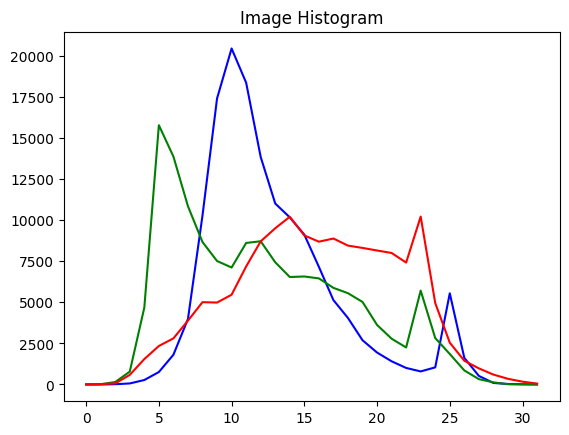

In [ ]:
# Plot histogram for a specific image
img = cv2.imread(directory+'/15881.Harry_Potter_and_the_Chamber_of_Secrets.jpg')
for i,color in enumerate(('b','g','r')):
    hist = cv2.calcHist([img],[i],None,[32],[0,256])
    plt.plot(hist,color = color)
plt.title('Image Histogram')
plt.show()

Υπολογισμός cosine similarity σε dictionary

In [ ]:
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def display(filename):
  image = cv2.imread(filename)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image_rgb)
  plt.axis('off')  # Turn off axes
  plt.show()

In [ ]:
def similar_covers(target_image_name, num=4):
  # print original image

  # Load and display the image
  display(target_image_name)
  img = cv2.imread(target_image_name)
  image_hist = calc_image_hist(img)


  # Find similar images
  similar_images = []
  for i in range(len(images_df)):
    image_vector = images_df.iloc[i]['Vector']
    similarity = cosine_similarity([image_hist], [image_vector])[0][0]
    similar_images.append((images_df.iloc[i]['Name'], similarity))

  similar_images_df = pd.DataFrame(similar_images, columns=['Name', 'Similarity'])
  similar_images_df.sort_values(by=['Similarity'], inplace=True, ascending=False)
  similar_images_df = similar_images_df.head(num)

  # And display them
  print("\nSimilar images:")
  for index, row in similar_images_df.iterrows():
    print("\nWith similarity", row['Similarity'], ":")
    display(row['Name'])

Οι εικόνες για testing βρίσκονται στον φάκελο img_test

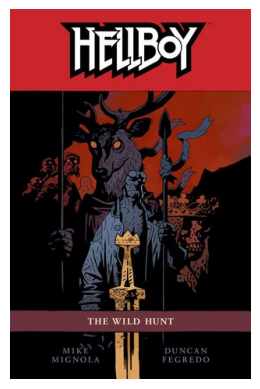


Similar images:

With similarity 0.9890223145484924 :


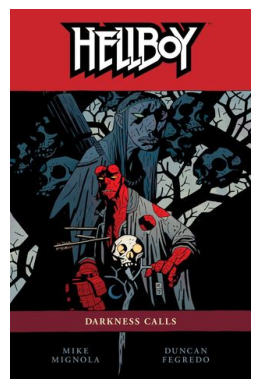


With similarity 0.9482021927833557 :


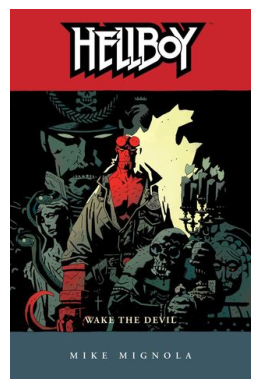


With similarity 0.9480922818183899 :


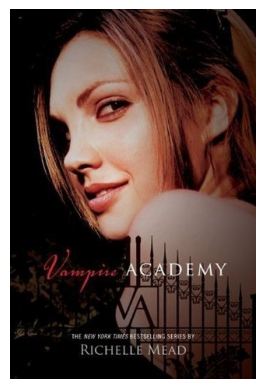


With similarity 0.9438633322715759 :


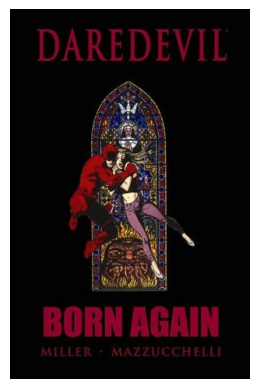

In [ ]:
image_name = "7131445-hellboy-vol-9.jpg"
similar_covers(directory+"_test/"+image_name)

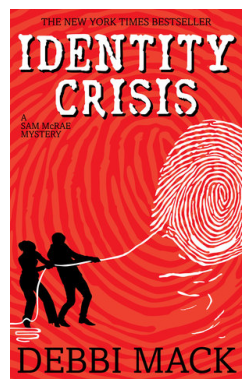


Similar images:

With similarity 0.8668246865272522 :


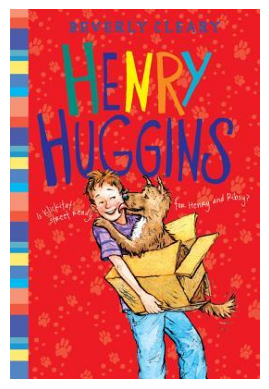


With similarity 0.6941854953765869 :


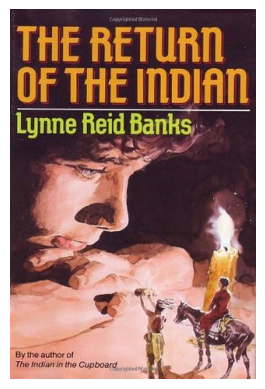


With similarity 0.6333293914794922 :


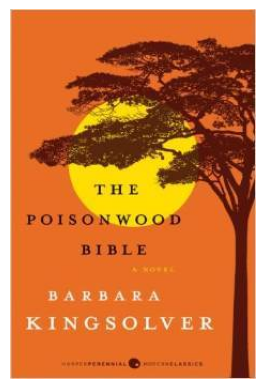


With similarity 0.6267799139022827 :


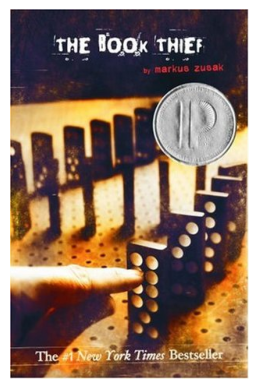

In [ ]:
image_name = "26159625-identity-crisis.jpg"
similar_covers(directory+"_test/"+image_name)

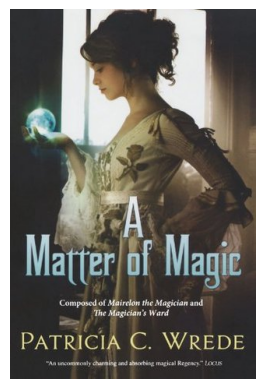


Similar images:

With similarity 0.9703372716903687 :


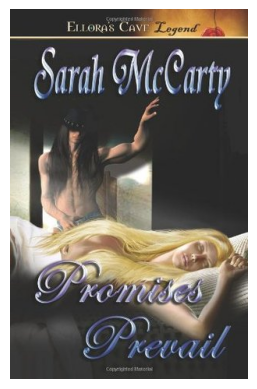


With similarity 0.9019560217857361 :


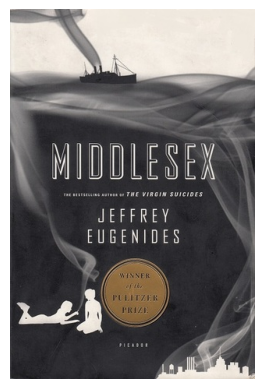


With similarity 0.8686009049415588 :


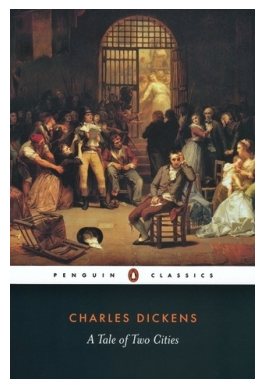


With similarity 0.8641948103904724 :


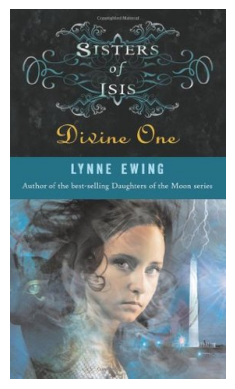

In [ ]:
image_name = "7278720-a-matter-of-magic.jpg"
similar_covers(directory+"_test/"+image_name)

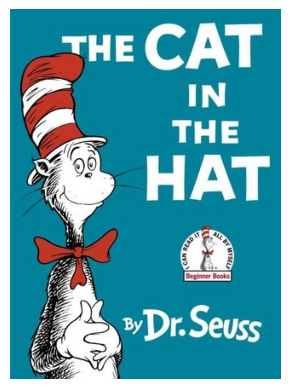


Similar images:

With similarity 0.6381404399871826 :


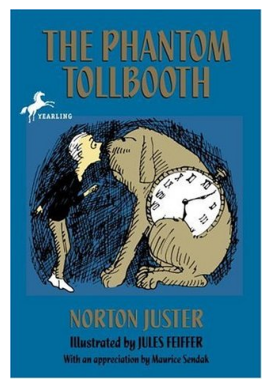


With similarity 0.5957641005516052 :


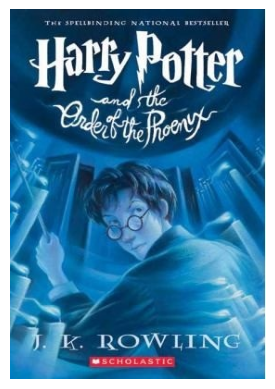


With similarity 0.5347775220870972 :


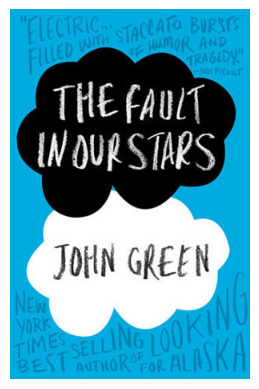


With similarity 0.5297083258628845 :


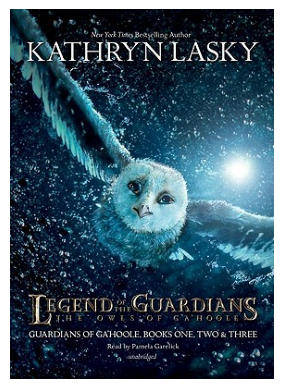

In [ ]:
image_name = "233093.The_Cat_in_the_Hat.jpg"
similar_covers(directory+"_test/"+image_name)

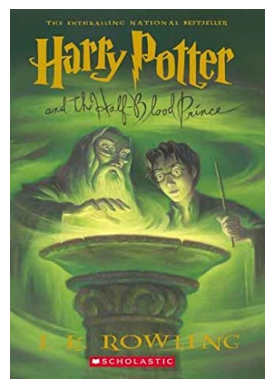


Similar images:

With similarity 0.9295530319213867 :


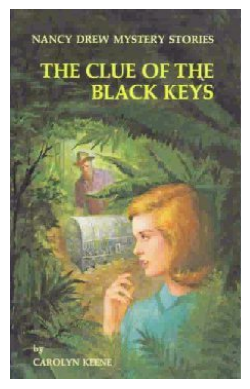


With similarity 0.8621547222137451 :


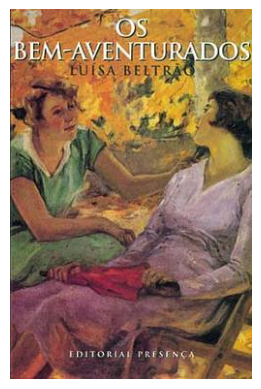


With similarity 0.851694643497467 :


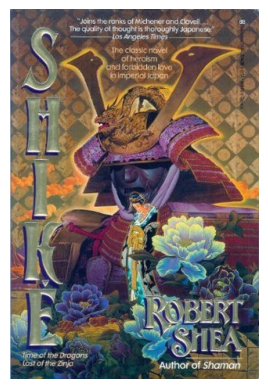


With similarity 0.8436580300331116 :


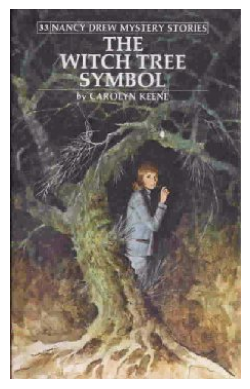

In [ ]:
image_name = "1.Harry_Potter_and_the_Half_Blood_Prince.jpg"
similar_covers(directory+"_test/"+image_name)